# Final Project: Module 2
### Statistical Modeling, Visualizations, and Data Storytelling




This notebook should be completed and submitted to gradescope by 5/10/2020 11:59 PM. More instructions regarding submissions are at the end of the notebook.

The following are some keyboard shortcuts you might find useful in Jupyter.


- `shift` + `enter`: run current cell (move cursor to next cell)
- `ctrl` + `enter`: run current cell
- `esc` + `h`: access keyboard shortcuts
- `esc` + `p`: access commands
- `esc` + `m`: change cell to 'Markdown'
- `esc` + `y`: change cell to 'Code'
- `esc` + `a`: insert code cell above
- `esc` + `b`: insert code cell below

### Table of Contents
* [Review](#review)
* [Statistical Modeling](#statistical)
    * [Hypothesis Testing](#hypothesis)
    * [Regression](#regression)
* [Visualizations](#visualizations)
* [Data Storytelling](#data)
    * [Module 1](#mod1)
    * [Module 2](#mod2)
* [Submission](#submission)

<a id='review'></a>
# Review

Congratulations on completing Module 1! Before we begin working on this module, we need to important the relevant python libraries and our cleaned dataset from the last module. Do so in the cell below.

In [22]:
import numpy as np
import pandas as pd

#Hint: we learned about this next group of libraries in our last lecture

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from IPython.display import display, Latex, Markdown
import scipy
from scipy import stats

dataset = pd.read_csv('bayarea_boba_spots.csv')
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

<a id='statistical'></a>
# Statistical Modeling

Now we will move on to deriving and visualizing insights from the data, regrading the problem we are trying to solve.

The two main types of models that you have learned thus far are hypothesis testing and linear/logistic regression. The next step will involve creating __one__ of the two models depending on what type of problem you are trying to solve. In the last module you should have been thinking about what data might be relevant for this model, now its time to apply it.  

There is no starter code provided for this portion. To get a better idea of what steps are required, refer to lecture 5. Use as many cells as you would like.

<a id='hypothesis'></a>
## Hypothesis Testing

Suppose that the boba shops given in the data set is a simple random sample of all bay area boba shops. We are going to perform a one-sample one-tailed t-test on the ratings of all boba shops.

In [35]:
# Get an array of ratings from the dataframe
rating = dataset.loc[:, ['rating']]

In [36]:
# Remove inner lists in rating.values to get a one-dimentional array of all ratings
rating_array = [r[0] for r in rating.values]

To infer the population mean of all boba shop ratings in the bay area, we will first visualize the distribution of ratings and get an idea of the mean and median of the ratings. Historgram would be the most informative. 

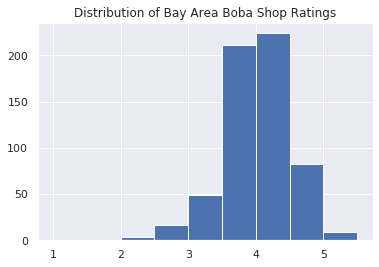

In [34]:
plt.hist(rating_array, bins = [1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]) 
plt.title("Distribution of Bay Area Boba Shop Ratings") 
plt.show()

Since Historgram bins are inclusive on the lower bound, exlusive on the upper bound, we can see that most boba shops have ratings of 3.5 and 4. We can confirm that by finding the sample mean, which is 3.77

In [37]:
np.mean(rating_array)

3.769681742043551

<b>We hypothesize that the mean of *all* Bay Area boba shops is greater than 3.75. Therefore, we are interested in testing the following hypotheses:</b>

__H0 : μ = 3.75 <br/>
HA: μ > 3.75__

We will run the following SciPy function to determine the t and p value of the test given our rating dataset.

In [45]:
# Running the SciPy 1-samp t-test
# Since the below function is a 2-tailed test, our p value for the one-tailed test is half of the result p
t, p = scipy.stats.ttest_1samp(rating_array, 3.75)
print ("t = ", t)
print ("p = ",  p/2)

t =  0.9457992148240669
p =  0.17231714229148104


At a confidnece level of α = 0.05, we reject the null hypothesis that the mean of all Bay Area boba shop rating is equal to 3.75 in favor of the alternative that it's greater than 3.75

<a id='regression'></a>
## Regression

We are going to explore if there is any correlation between the number of stores a brand has in the Bay Area and the average rating of all of its stores. We will do so by extracting data points from the dataframe, plot a scatter plot, and draw the linear regression line of best fit. 

In [86]:
# Aggregate the data set and extract the number of stores of each brand in to an array
numStores = dataset.groupby(['name']).agg(np.size)
numStores_array = [r[1] for r in numStores.values]


In [85]:
# Extract the average rating of each store into an array
avgRating = dataset.groupby(['name']).agg(np.mean)
avgRating_array = [r[1] for r in avgRating.values]

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


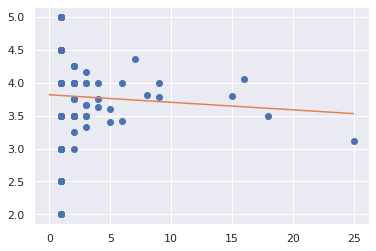

In [83]:
# Plot the scatter plot
# x axis --> the number of stores a brand has
# y axis --> the average rating of all stores in the corresponding brand
# The line is a linear regression line of best fit line
x = numStores_array
y = avgRating_array

plt.plot(x, y, 'o');

m, b = np.polyfit(x, y, 1)

ax = plt.axes()
x = np.linspace(0, 25, 100)
ax.plot(x, m*x+b);

In [84]:
print(m)

-0.01144682442301857


The slope of the linear regression line of best fit is -0.011, very insignificant. Thus, we see that there is barely any correlation between the number of stores and the quality of the brand.

<a id='visualizations'></a>
# Visualizations

Last week, we covered how understanding data types are essential to representing our data accurately through our visualization libraries - Matplotlib and Seaborn.

<b><span style="color: red;">Please fer to the linear regression scatter plot and the histogram in the first part to account for credits in visualizations! I find it more intuitive to include the visualizations there. </span><b/>

Some visualizations only work with certain data types! Here is a quick review of the differences between each data type:
    - Categorical Data - “Descriptive” data
        - Ordinal Data
            - Variables that are ordered - where order is essential to understanding the dataset (ie education 
                level)
        - Nominal Data
            - Variables that are not ordered, unordered data (ie gender)
            
    - Numerical Data - Data that can be measured in tangible measurements, aka numbers
        - Continuous Data
            - Variables that can take on a continuous number of values (ie height, weight)
        - Discrete Data
            - Variables that can only take on fixed values 


Now that we’ve reviewed data types, let's jump into our visualizations! This is only a basic review of what we learned. For purposes of this section, please refer to the notebook attached with last week’s lecture to understand how we can make our graphs more accurate for what we are trying to represent. 

In [ ]:
#Line Plots - Comparing numerical data (either discrete or continuous)

Matplotlib: `plt.plot(x = _____, y ____)`
Seaborn: `sns.lineplot(x = _____, y = ____)`


In [ ]:
#Barplots - Comparing categorical and numerical data

Matplotlib:  `plt.bar(x = ____, height = ____)`
Seaborn: `sns.barplot(x = ____, y = _____)`


In [ ]:
#Scatterplots - Comparing continuous numerical data 

...
...


<a id='data'></a>
# Data Storytelling

Great work figuring out the claim you wanted to prove and supporting it with data and visualizations! You have now arrived at the last stage of the data analysis lifecycle: storytelling. In this last part, you will write a brief paragraph of what you did in Module 1 and Module 2 in each of the cells below.

<a id='mod1'></a>
## Module 1

For Module 1, be sure to explain:
    - How data was found and cleaned up to the final usable dataframe.
    - Notable characteristics you found when sorting/mutating data.
    - Relevant aggregate values derived from dataframe and their implication.

The dataset on boba stores and ratings around the Bay Area is found on Kaggle. During the data cleaning process, duplicate rows are removed. For most parts of my analysis, longitude, attitude of the stores are removed because they are not relavent to my  analysis. 
Through my sorting/analysis, I was able to find out the boba brands that had the most shops around the Bay Area, as well as the best rating boba shops in Berkeley and San Francisco. I was also able to find out that there are 174 boba shops near me (Berkeley & SF) and the best city for boba are Brisbane	and Corte Madera, each has a rating of 4.5

<a id='mod2'></a>
## Module 2

For Module 2, be sure to explain:
    - The overarching claim/question you were trying to prove or answer.
    - Whether hypothesis testing or linear regression were used and why.
        - What did you find?
    - Relevant visualizations created and the insights they provided.
    - Final conclusion you reached and closing thoughts on your data analysis as a whole.

My overarching questions were:
1) If the mean of all bay area boba shops, including the ones not listed in the data set is above 3.75
2) if there is a correlation between the ratings of a brand and how many shops the brand has
I used hypothesis testing for 1) and linear regression for 2) because in the first prompt we were trying to prove against a null hypothesis, and in the second prompt we were trying to find the relationship between two numerical data.

The histogram tells us the distribution of store ratings and told us that most stores have ratings between 3.5 and 4.
The scatter plot and best fit line shows us that there's no relationship between the number of stores a brand has and its average rating.

<a id='submission'></a>
# Submission

We're finally done with the project!!! Hopefully you were able to learn and practice techniques in numpy and seaborn to test and visualize data.

To submit this assignment, go to the upper left corner and press "File" --> "Download as" --> "PDF via LaTeX (.pdf)". Then, upload the PDF to gradescope under the Project - Module 2 assignment.

Congrats on completing this project! You successfully explored, cleaned, and analyzed a dataset from start to finish to answer a question about the world. Use these techniques to develop your own projects in the future and keep learning. We'd love to get feedback about this project: what you did and didn't like, and any suggestions for creating a better learning experience; please respond to the google form below!

https://forms.gle/czcs46QLfaPbmePy6